In [1]:
from large_gcs.algorithms.search_algorithm import AlgMetrics, SearchNode
from large_gcs.domination_checkers.reaches_new_containment import ReachesNewContainment
from large_gcs.graph.incremental_contact_graph import IncrementalContactGraph
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGeneratorParams
from large_gcs.geometry.polyhedron import Polyhedron

import numpy as np
import logging
from pydrake.all import (MathematicalProgram, HPolyhedron)

logging.basicConfig(level=logging.WARN)
logging.getLogger("large_gcs").setLevel(logging.DEBUG)

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
from large_gcs.domination_checkers.reaches_cheaper_containment import ReachesCheaperContainment


Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-05


/home/shaoyuan/Documents/Software/pypolycontain/pypolycontain/conversions.py:19: UserWarning: WARNING: You don't have CDD package installed. Unable to visualize polytopes. You may still visualize zonotopes.
  warnings.warn("WARNING: You don't have CDD package installed. Unable to visualize polytopes. You may still visualize zonotopes.")
/home/shaoyuan/Documents/Software/pypolycontain/pypolycontain/containment.py:16: UserWarning: You don't have CDD package installed. Unable to run cone ray generation.
  warnings.warn("You don't have CDD package installed. Unable to run cone ray generation.")


In [2]:


graph_file = ContactGraphGeneratorParams.inc_graph_file_path_from_name(
    "cg_trichal4"
)
cg = IncrementalContactGraph.load_from_file(
    graph_file,
    should_incl_simul_mode_switches=False,
    should_add_const_edge_cost=True,
    should_add_gcs=True,
    should_use_l1_norm_vertex_cost=True,
)
# fmt: off
expansion_order = [['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_v1-obj0_f3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_v0-rob0_f0')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f1-rob0_f1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f0-rob0_v1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f0-rob0_v1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_v0-rob0_f0', 'IC|obj0_f0-rob0_v1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f0-rob0_v1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_v0-rob0_f0', 'IC|obj0_f0-rob0_v1')", 'target']]
# fmt: on
dom_ns = ReachesCheaperContainment(graph=cg, construct_path_from_nullspaces=True)
dom_ns.set_alg_metrics(AlgMetrics())
dom_fs = ReachesCheaperContainment(graph=cg, construct_path_from_nullspaces=False)
dom_fs.set_alg_metrics(AlgMetrics())
for path in expansion_order[:-1]:
    cg.add_vertex_path_to_graph(path)
    node = SearchNode.from_vertex_path(path)
    logger.info("Checking path: %s", path)
    AH_poly_ns = dom_ns._create_path_AH_polytope_from_nullspace_sets(node)
    AH_poly_fs = dom_fs._create_path_AH_polytope(node)
    logger.debug(f"Dimensions of AH_poly_ns: {AH_poly_ns.T.shape}, AH_poly_fs: {AH_poly_fs.T.shape}")
    # They should be the same polyhedrons
    assert dom_fs.is_contained_in(AH_poly_ns, AH_poly_fs)
    assert dom_fs.is_contained_in(AH_poly_fs, AH_poly_ns)

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 31068.92it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 16611.10it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 3 body pairs...
100%|██████████| 3/3 [00:00<00:00, 190.81it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (100)
100%|██████████| 100/100 [00:00<00:00, 27780.53it/s]
INFO:__main__:Checking path: ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')"]
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:_create_path_AH_polytope_from_nullspace_sets
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:path prog is empty: False
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:AHContainmentDominationChecker.get_nullspace_H_transformation
DEBUG:large_gcs.domination_checkers.ah_containment_dom

In [3]:
path = expansion_order[0]
cg.add_vertex_path_to_graph(path)
node = SearchNode.from_vertex_path(path)
# print(node.vertex_name)
# cg.generate_and_plot_samples_in_set(node.vertex_name, 1)

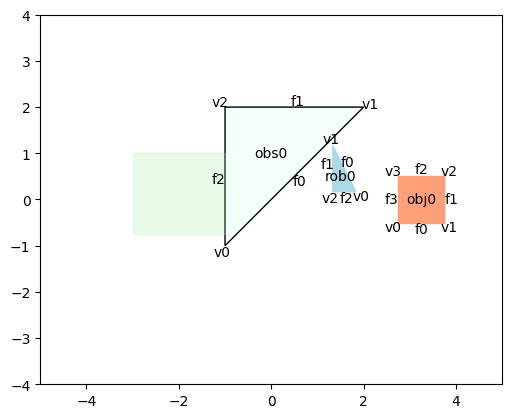

In [4]:
cg.plot()

In [5]:
from large_gcs.contact.contact_set import ContactSet
from large_gcs.geometry.geometry_utils import create_selection_matrix


def get_H_transform_rob_first_pos(node, total_dims):
    # First, collect all the decision variables
    v_dims = [
        cg.vertices[name].convex_set.dim for name in node.vertex_path
    ]
    current_index = 0
    # Collect the indices of the decision variables for each vertex
    x = []
    for dim in v_dims:
        x.append(list(range(current_index, current_index + dim)))
        current_index += dim
    logger.debug(f"x: {x}")
    terminal_set: ContactSet = cg.vertices[node.vertex_name].convex_set
    # selected_indices = list(terminal_set.vars.first_obj_first_pos_from_all(x[-1])) # same
    # selected_indices = [8,10] # robot first pos knot point BUG
    # selected_indices = [9,11] # robot second pos knot point
    # selected_indices = [12,13] # robot force
    # selected_indices = [9,12] # 
    selected_indices = np.concatenate(x)

    logger.debug(f"selected_indices: {selected_indices}")
    return create_selection_matrix(selected_indices, total_dims)


DEBUG:__main__:x: [[0, 1, 2, 3], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
DEBUG:__main__:selected_indices: [4, 6]

In [6]:

# dom_ns.get_H_transformation = get_H_transform_rob_first_pos
# dom_fs.get_H_transformation = get_H_transform_rob_first_pos
AH_poly_ns = dom_ns._create_path_AH_polytope_from_nullspace_sets(node, add_upper_bound=True)
AH_poly_fs = dom_fs._create_path_AH_polytope(node)
assert dom_fs.is_contained_in(AH_poly_ns, AH_poly_fs)
assert dom_fs.is_contained_in(AH_poly_fs, AH_poly_ns)
# cg.plot()



DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:_create_path_AH_polytope_from_nullspace_sets
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:path prog is empty: False
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:AHContainmentDominationChecker.get_nullspace_H_transformation
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:X is empty: False
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:_create_path_AH_polytope
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Checking containment
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Solving containment prog
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Checking containment
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Solving containment prog


In [7]:
path_ns_poly = Polyhedron(H=AH_poly_ns.P.H, h=AH_poly_ns.P.h)
path_ns_poly.transform_vertices(AH_poly_ns.T, AH_poly_ns.t)
# path_ns_poly.plot_transformation(AH_poly_ns.T, AH_poly_ns.t)


SystemExit: Failure at geometry/optimization/vpolytope.cc:120 in VPolytope(): condition 'hpoly.IsBounded()' failed.

/home/shaoyuan/Documents/Software/large_gcs/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
path_fs_poly = Polyhedron(H=AH_poly_fs.P.H, h=AH_poly_fs.P.h)
# path_fs_poly.plot_transformation(AH_poly_fs.T, AH_poly_fs.t, marker="x")
path_fs_poly.transform_vertices(AH_poly_fs.T, AH_poly_fs.t)



In [ ]:

from large_gcs.contact.contact_set import ContactSet
from large_gcs.geometry.nullspace_set import NullspaceSet



# for i in range(len(node.vertex_path)):
#     logger.debug(f"vertex {i}: {node.vertex_path[i]}")
#     convex_set: ContactSet = cg.vertices[node.vertex_path[i]].convex_set
#     ns_set: NullspaceSet = cg.vertices[node.vertex_path[i]].convex_set.nullspace_set
#     logger.debug(f"V: {ns_set.V.shape}, x_0: {ns_set.x_0.shape}")
#     logger.debug(f"{convex_set.vars.all}")
#     logger.debug(f"V: \n{ns_set.V}, \nx_0: \n{ns_set.x_0}")


In [ ]:
prog_ns, full_dim = dom_ns.get_nullspace_path_mathematical_program(node)
h_poly_ns = HPolyhedron(prog_ns)
logger.debug(f"{h_poly_ns.A().shape}, {h_poly_ns.b().shape}")
logger.debug(f"\n{h_poly_ns.A()}, \n{h_poly_ns.b()}")
# T_H, t_H = dom_ns.get_nullspace_H_transformation(
#         node, full_dim=full_dim, ns_dim=h_poly.ambient_dimension()
#     )
# # logger.debug(f"T_H: {T_H.shape}, t_H: {t_H.shape}")
# # logger.debug(f"\nT_H: \n{T_H}, \nt_H: \n{t_H}")
# K, k, T, t, V, x_0 = dom_fs._nullspace_polyhedron_and_transformation_from_HPoly_and_T(
#     h_poly, T_H, t_H
# )
# logger.debug(f"K: {K.shape}, k: {k.shape}, T: {T.shape}, t: {t.shape}, V: {V.shape}, x_0: {x_0.shape}")
# # logger.debug(f"\nK: \n{K}, \nk: \n{k}, \nT: \n{T}, \nt: \n{t}")
# # T_H = dom_fs.get_H_transformation(node, h_poly.ambient_dimension())
# # K, k, T, t = dom_fs._nullspace_polyhedron_and_transformation_from_HPoly_and_T(
# #     h_poly, T_H
# # )
# # logger.debug(f"K: {K.shape}, k: {k.shape}, T: {T.shape}, t: {t.shape}")
# # logger.debug(f"\nK: \n{K}, \nk: \n{k}, \nT: \n{T}, \nt: \n{t}")
# # X = pp.H_polytope(K, k)
# # return pp.AH_polytope(t, T, X)

In [ ]:
# from IPython.display import Markdown, display
# display(Markdown(prog.ToLatex()))

In [ ]:
x_0 = np.array([ 1.76776695, -4.94974747,  6.776462  , -6.42991058, -5.89256958, 0.        ])

In [ ]:
x_0.shape

In [ ]:
ns_set: NullspaceSet = cg.vertices[node.vertex_path[1]].convex_set.nullspace_set
ns_set.V.shape
ns_set.V @ x_0


In [ ]:
cg.source_pos

In [ ]:
node.vertex_path

path x_0 should be a feasible point in the path nullspace.

Ax_0 should = b

In [ ]:
h_poly_ns.A().shape, h_poly_ns.b().shape

In [ ]:
h_poly_ns.A() @ x_0 - h_poly_ns.b()

In [ ]:
from large_gcs.geometry.polyhedron import Polyhedron

prog_ns, full_dim = dom_ns.get_nullspace_path_mathematical_program(node)
h_poly_ns = HPolyhedron(prog_ns)
# logger.debug(f"{h_poly.A().shape}, {h_poly.b().shape}")
# logger.debug(f"\n{h_poly.A()}, \n{h_poly.b()}")
dom_ns.get_H_transformation = get_H_transform_rob_first_pos
T_H, t_H = dom_ns.get_nullspace_H_transformation(
        node, full_dim=full_dim
    )
# # logger.debug(f"T_H: {T_H.shape}, t_H: {t_H.shape}")
# # logger.debug(f"\nT_H: \n{T_H}, \nt_H: \n{t_H}")
K, k, T, t = dom_fs._nullspace_polyhedron_and_transformation_from_HPoly_and_T(
    h_poly_ns, T_H, t_H)

prog_fs = dom_fs.get_path_constraint_mathematical_program(node)



path_ns_poly = Polyhedron(H=K, h=k)
path_ns_poly.plot_transformation(T, t)

In [ ]:
cg.plot()
path_ns_poly.plot()
